#### plotting the 2D data generated with processing_2d.py script 

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt


In [66]:
direct = '/Users/work/Documents/GitHub/mlgenomics/data_preprocessing/Wang_2018_all_2D_3D_processed.npz'
data = np.load(direct)['arr_0']

FileNotFoundError: [Errno 2] No such file or directory: '/Users/work/Documents/GitHub/mlgenomics/data_preprocessing/Wang_2018_all_2D_3D_processed.npz'

In [52]:
data[data[:,-1]==33,-1]=10

In [61]:
data[:,-1] = data[:,-1].astype('int')

In [65]:
data[:,-1] 

array([ 0.,  0.,  0., ..., 10., 10., 10.])

In [58]:
np.savez('/Users/work/Documents/GitHub/mlgenomics/data_preprocessing/Wang_2018_all_2D_3D_processed_new.npz',data)

In [68]:
# leave out one dataset 

direct = '/Users/work/Documents/GitHub/mlgenomics/data_preprocessing/Wang_2018_all_2D_3D_processed_new.npz'
data = np.load(direct)['arr_0']


In [70]:
data = data[data[:,-1]!=0,:]

In [72]:
data = data[data[:,-1]!=1,:]

In [73]:
np.unique(data[:,-1])

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [74]:
np.savez('/Users/work/Documents/GitHub/mlgenomics/data_preprocessing/Wang_2018_all_2D_3D_processed_new_0_1_leftout.npz',data)

In [36]:
def plot_annotations(data,exclude):
    new_data = []
    new_labels = []
    for i in range(len(dirs)):
        data_dir = os.path.join('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/combinatorially_encoded/all_datasets',dirs[i],'class_labels.csv')
        labels = pd.read_csv(data_dir)
        if labels.shape[0] < data[i].shape[0]:
            new_data.append(data[i][range(labels.shape[0]),-4:])
            labels = labels['ClusterName'].to_list()
            new_labels.append([None if item in exclude else item for item in labels])
        else:
            new_data.append(data[i][:,-4:])
            labels = labels.loc[range(data[i].shape[0]),:]
            labels = labels['ClusterName'].to_list()
            labels = [None if item in exclude else item for item in labels]
            new_labels.append(labels)


    all_labels = np.concatenate(new_labels)
    all_newdata = pd.DataFrame(np.concatenate(new_data))

    all_d = pd.concat([all_newdata, pd.DataFrame(all_labels)],axis=1)
    all_d.columns = ['x', 'y','z','dataset','label']
    all_d.head()

    g = sns.FacetGrid(all_d, col='dataset', margin_titles=True, height=3,  col_wrap=5, hue = 'label',palette= sns.color_palette("bright", 11), sharex=False, sharey=False)
    g.map(plt.scatter, 'x', 'y', s=5, lw=1)
    g.add_legend()

    return g, labels


def plot_genes(data,index,genename, cmap):
    
  
    all_newdata = pd.DataFrame(data)
    all_d = pd.concat([all_newdata.loc[:,list(range(1030,1034))], pd.DataFrame(all_newdata.loc[:,index])], axis = 1)
    all_d.columns = ['x', 'y','z','dataset',genename ]
    vmin = np.min(all_d[genename])
    vmax = np.max(all_d[genename])
    
    g = sns.FacetGrid(all_d, col='dataset', margin_titles=True, height=3,  col_wrap=5, hue = genename,palette= cmap, sharex=False, sharey=False)
    g.map(plt.scatter, 'x', 'y', s=5, lw=1, vmin = vmin, vmax = vmax)
    
    # Make space for the colorbar
    g.fig.subplots_adjust(right=.92)

    # Define a new Axes where the colorbar will go
    cax = g.fig.add_axes([.94, .25, .02, .6])

    # Get a mappable object with the same colormap as the data
    points = plt.scatter([], [], c=[], vmin=vmin, vmax=vmax, cmap=cmap)

    # Draw the colorbar
    g.fig.colorbar(points, cax=cax)

    return g

# function from here: https://github.com/weallen/STARmap/blob/master/python/analysis.py
def load_data(data_dir, prefix="Cell"):
        #expr = pd.read_csv(os.path.join(data_dir, "data_table.csv"), index_col=0)
    expr = pd.read_csv(os.path.join(data_dir, "cell_barcode_count.csv"), header=None)
    gene_names = pd.read_csv(os.path.join(data_dir, "cell_barcode_names.csv"),header=None)
    rownames = [i for i in range(expr.shape[0])]
    names = gene_names[2]
    names.name = "Gene"
    return pd.DataFrame(data=expr.values, columns=names, index=rownames)


In [10]:
#  get union of all gene names (across 3D and 2D datasets)
genenames_3D = pd.read_csv('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/sequentially_encoded_Wang_et_al_2018/gene_names.csv', header = 0)

dirs = os.listdir('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/combinatorially_encoded/all_datasets')

ct = []

for i in range(len(dirs)):

    data_dir1 = os.path.join('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/combinatorially_encoded/all_datasets',dirs[i])

    ct.append(load_data(data_dir1, prefix=""))

genenames = []
for i in range(len(dirs)):
    genenames.append(ct[i].columns)

all_genes = np.unique(np.concatenate((np.unique(np.concatenate(genenames)),(np.array(genenames_3D).flatten()))))


array([[2.70124257e-05, 2.70124257e-05, 2.70124257e-05, ...,
        1.41388478e-01, 0.00000000e+00, 0.00000000e+00],
       [1.19019281e-05, 1.19019281e-05, 1.19019281e-05, ...,
        2.15096974e-01, 0.00000000e+00, 0.00000000e+00],
       [1.07503763e-05, 1.07503763e-05, 1.07503763e-05, ...,
        2.03201107e-01, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.12033942e-03, 0.00000000e+00, 9.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.70914754e-01, 0.00000000e+00, 9.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.43827998e-01, 0.00000000e+00, 9.00000000e+00]])

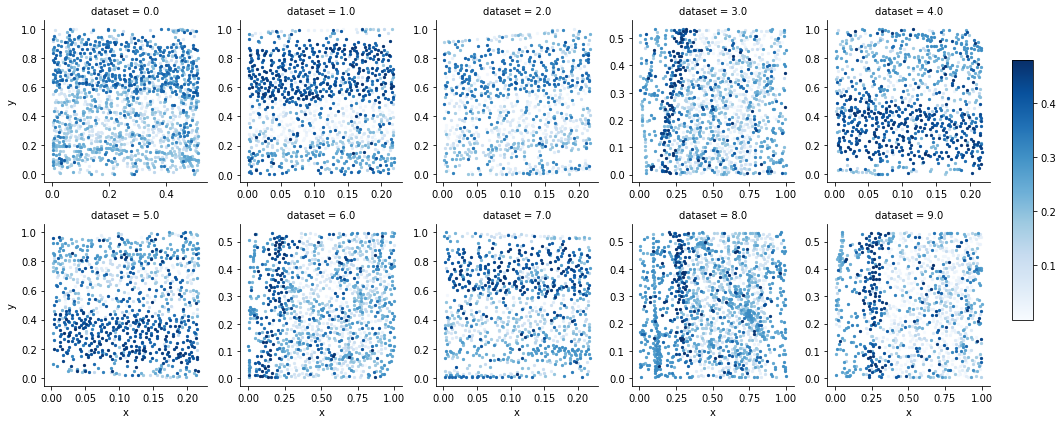

In [14]:
 plot_genes(data[data[:,-1]!=33,:],np.array(np.argwhere(all_genes=='Cux2')).flatten(),'Cux2', 'Blues')

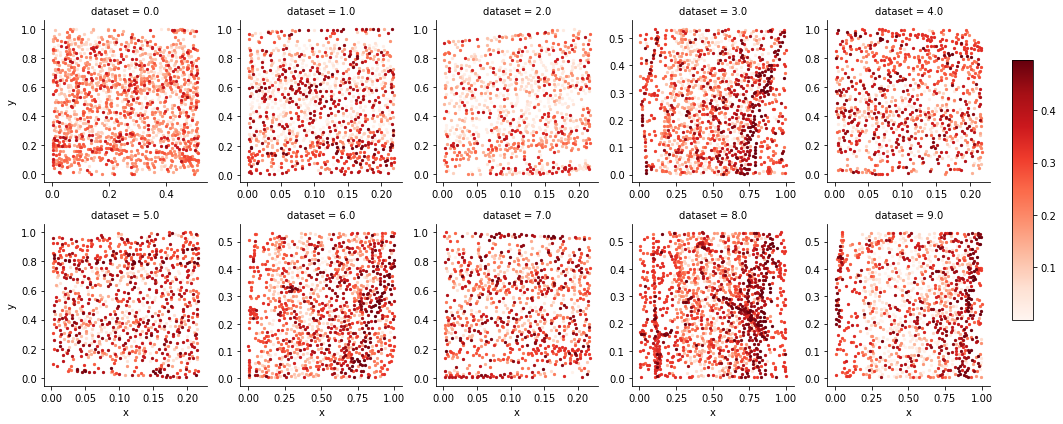

In [39]:
 plot_genes(data[data[:,-1]!=33,:],np.array(np.argwhere(all_genes=='Ctgf')).flatten(),'Ctgf', 'Reds')

In [54]:
threed = data[data[:,-1]==10,:]

In [55]:
 threed[:,-2]

array([0.0038674 , 0.00441989, 0.00331492, ..., 0.0519337 , 0.0519337 ,
       0.0519337 ])

<IPython.core.display.Javascript object>


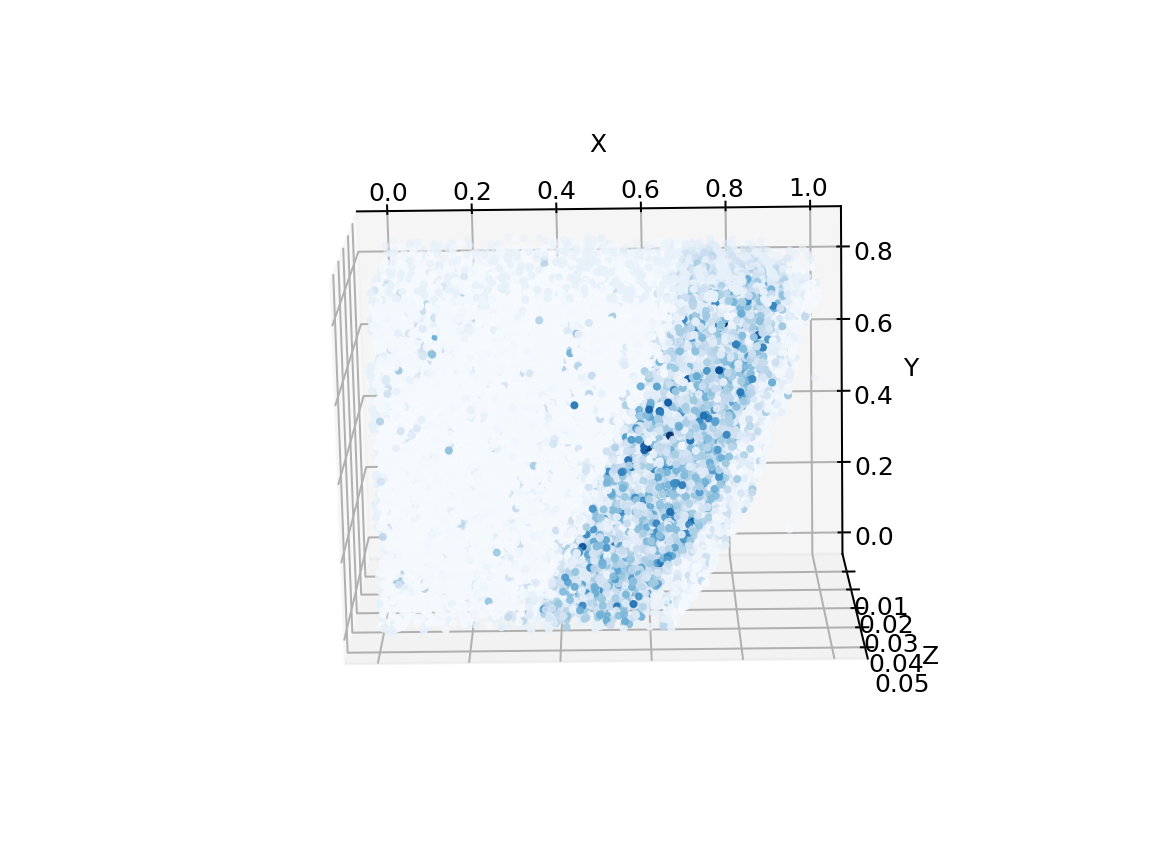

In [56]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(threed[:,-4],threed[:,-3], threed[:,-2], cmap = 'Blues',c=np.array(threed[:,np.array(np.argwhere(all_genes=='Cux2')).flatten()]).flatten(), marker='.', s =20)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [215]:
ncells=[]
for i in range(len(data)):
    
    ncells.append(data[i].shape[0])

In [242]:
f = pd.concat([pd.DataFrame(dirs),pd.DataFrame(ncells), pd.DataFrame(region), pd.DataFrame(list(range(0,10))), pd.DataFrame(genenumber),
          pd.DataFrame(dimensions),pd.DataFrame(volume)],axis =1)

In [244]:
f.columns = ['dataset', 'N cells', 'region', 'dataset ID', 'N genes', 'section dim.', 'cell density']

In [245]:
f

,dataset,N cells,region,dataset ID,N genes,section dim.,cell density
0,20180505_BY3_1kgenes,1549,vc,0,~1020,ik,ik
1,20171110_BF2_dark,1151,vc,1,~160,[1.4 mm x 0.3 mm x 8 um],[2740 cells/ 1mm^3]
2,20180410-BY3_1kgenes,973,vc,2,~1020,ik,ik
3,20180421_BZ19_cocaine,1320,mpfc,3,~160,cocaine,cocaine
4,20170915_BD2_dark,941,vc,4,~160,[1.4 mm x 0.3 mm x 8 um],[2740 cells/ 1mm^3]
5,20171115_BF5_light,975,vc,5,~160,[1.4 mm x 0.3 mm x 8 um],[2740 cells/ 1mm^3]
6,20180424_BZ14_control,1215,mpfc,6,~160,control,control
7,20171120_BF4_light,912,vc,7,~160,[1.4 mm x 0.3 mm x 8 um],[2740 cells/ 1mm^3]
8,20180419_BZ9_control,1380,mpfc,8,~160,control,control
9,20180417_BZ5_control,1127,mpfc,9,~160,control,control


In [224]:
# add region

# add number of genes 

region = ['vc', 'vc', 'vc', 'mpfc','vc', 'vc',  'mpfc', 'vc',  'mpfc', 'mpfc']
genenumber = ['~1020', '~160', '~1020', '~160','~160', '~160',  '~160', '~160',  '~160', '~160']

In [228]:
dimensions = ['ik', ['1.4 mm x 0.3 mm x 8 um'], 'ik',
              'cocaine', ['1.4 mm x 0.3 mm x 8 um'], ['1.4 mm x 0.3 mm x 8 um'], 
              'control', ['1.4 mm x 0.3 mm x 8 um'], 'control', 'control' ]

In [227]:
ld dimensions

[['1.4 mm x 0.3 mm x 8 um'],
 ['1.4 mm x 0.3 mm x 8 um'],
 ['1.4 mm x 0.3 mm x 8 um'],
 ['1.4 mm x 0.3 mm x 8 um']]

In [232]:
1151/(0.008*0.3*1.4)

342559.52380952385

In [235]:
volume = (0.3*1.4)

In [236]:
1151/volume

2740.4761904761904

In [237]:
volume = ['ik', ['2740 cells/ 1mm^3'], 'ik',
              'cocaine',['2740 cells/ 1mm^3'], ['2740 cells/ 1mm^3'], 
              'control', ['2740 cells/ 1mm^3'], 'control', 'control' ]

In [258]:
for i in range(len(dirs)):
    print(np.min(np.sum(data[i],axis=1)))

506.99999999999994
167.0
334.00000000000006
590.0
292.99999999999994
642.0000000000002
176.99999999999997
77.0
182.0
208.99999999999997


# plotting new 2D data

In [47]:
out = np.load('/Users/work/Documents/GitHub/mlgenomics/data_preprocessing/Wang_2018_all_2D_3D_processed.npz')['arr_0']
out[out[:,-1]==0,:]

array([[2.70124257e-05, 2.70124257e-05, 2.70124257e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.19019281e-05, 1.19019281e-05, 1.19019281e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.07503763e-05, 1.07503763e-05, 1.07503763e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

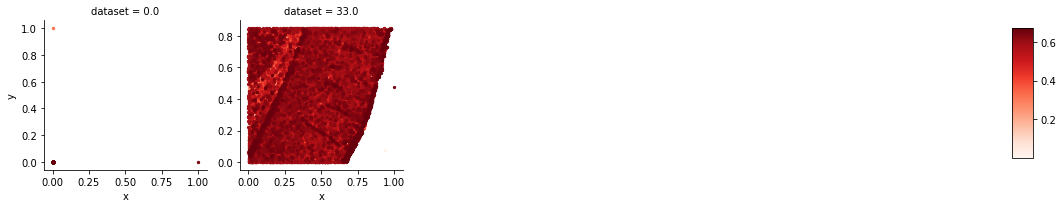

In [56]:
 plot_genes(out,np.array(np.argwhere(all_genes=='Ctgf')).flatten(),'Ctgf', 'Reds')

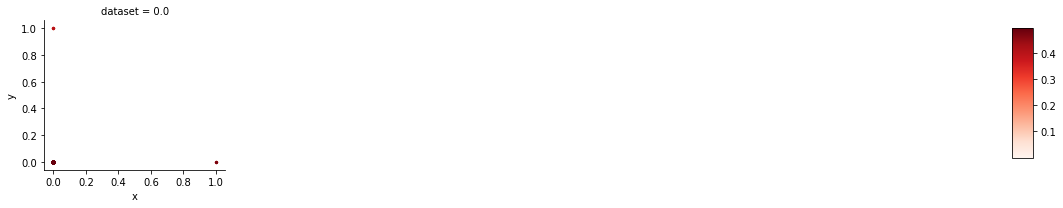

In [58]:
 plot_genes(out[out[:,-1]!=33,:],np.array(np.argwhere(all_genes=='Ctgf')).flatten(),'Ctgf', 'Reds')

In [57]:
out[out[:,-1]!=33,:]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.17679558e-01, 3.86740331e-03, 3.30000000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.93370166e-01, 4.41988950e-03, 3.30000000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.43093923e-01, 3.31491713e-03, 3.30000000e+01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.33149171e-01, 5.19337017e-02, 3.30000000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.67955801e-01, 5.19337017e-02, 3.30000000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.52486188e-01, 5.19337017e-02, 3.30000000e+01]])

In [55]:
dirs = os.listdir('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/combinatorially_encoded/all_datasets')


exclude = set(('Astro-1',
 'Astro-2',
 'Endo',
 'Micro',
 'Oligo',
 'PVALB',
 'Reln',
 'SST',
 'Smc',
 'VIP','Astro', 'PV','NPY','Lhx6','nan'))

g, labels = plot_annotations(out,exclude, 1030,1034)

IndexError: too many indices for array